In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('my_drive')

Mounted at my_drive


In [3]:
base = pd.read_csv('/content/my_drive/MyDrive/Attention_Exp/DIVA_Base/log.csv', usecols=['epoch', 'mean_squared_error'])
rnan = pd.read_csv('/content/my_drive/MyDrive/Attention_Exp/DIVA_RNAN/log.csv', usecols=['epoch', 'mean_squared_error'])
nlres_attn = pd.read_csv('/content/my_drive/MyDrive/Attention_Exp/DIVA_NLResAttn/log.csv', usecols=['epoch', 'mean_squared_error'])
mha = pd.read_csv('/content/my_drive/MyDrive/Attention_Exp/DIVA_MultiHeadAttn/log.csv', usecols=['epoch', 'mean_squared_error'])
#f100 = pd.read_csv('/content/my_drive/MyDrive/CNRS Research/Deep_DeQuIP_100_FOCUS/log.csv', usecols=['epoch', 'mean_squared_error'])

In [4]:
nlres_attn_memory = pd.read_csv('/content/my_drive/MyDrive/Attention_Exp/DIVA_NLResAttn_Memory/log.csv', usecols=['epoch', 'mean_squared_error'])
mha_memory = pd.read_csv('/content/my_drive/MyDrive/Attention_Exp/DIVA_MultiHeadAttn_Memory/log.csv', usecols=['epoch', 'mean_squared_error'])

In [ ]:
'''

BASE : BASELINE DIVA MODEL WITH REGULAR CONVOLUTION BASED INTERACTION LAYER.
-------
RNAN (RESIDUAL NON-LOCAL ATTENTION NETWORK) : INSPIRED FROM THE RNAN PAPER,
DIRECT IMPLEMENTATION OF RESIDUAL ATTENTION NETWORK, REPLACING THE INTERACTION LAYER IN DIVA MODEL.
-------
MHA (MULTIHEAD-ATTENTION) : STANDARD MULTI-HEAD ATTENTION LAYER TO CAPTURE GLOBAL DEPENDENCIES
FROM THE INITIAL PATCHES, REPLACING THE INTERACTION LAYER.
-------
NLRES_ATTN (NON-LOCAL RESIDUAL ATTENTION) : HYBRID CONVOLUTION AND ATTENTION BASED LAYER TO CAPTURE LOCAL
AND GLOBAL FEATURES FROM INITIAL PATCHES, INSPIRED FROM RNAN AND DRANET PAPER.


'''

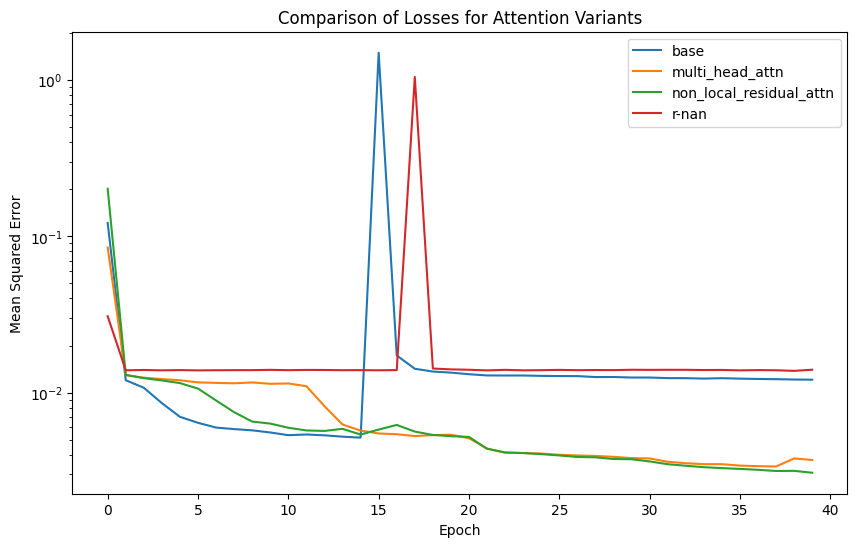

In [6]:
attn = {
    'base': base,
    'multi_head_attn': mha,
    'non_local_residual_attn': nlres_attn,
    'r-nan' : rnan
}

# Create a plot
plt.figure(figsize=(10, 6))

# Plot each dataset
for label, df in attn.items():
    plt.plot(df['epoch'], df['mean_squared_error'], label=label)

plt.yscale('log')
plt.title("Comparison of Losses for Attention Variants")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

In [ ]:
'''

Attention Layers require a lot of memory, which increases exponentially
with increase in the number of parallel multi-attention heads, leading to issues
during Inference Time.

_Memory variants are models with only 1 attention head, having key_dimension = Number of Filters in DIVA model,
leading to more efficient use of GPU memory, without leading to increase in loss functions.

Instead, Memory efficient NLRes performs equally as Regular NLRes.

'''

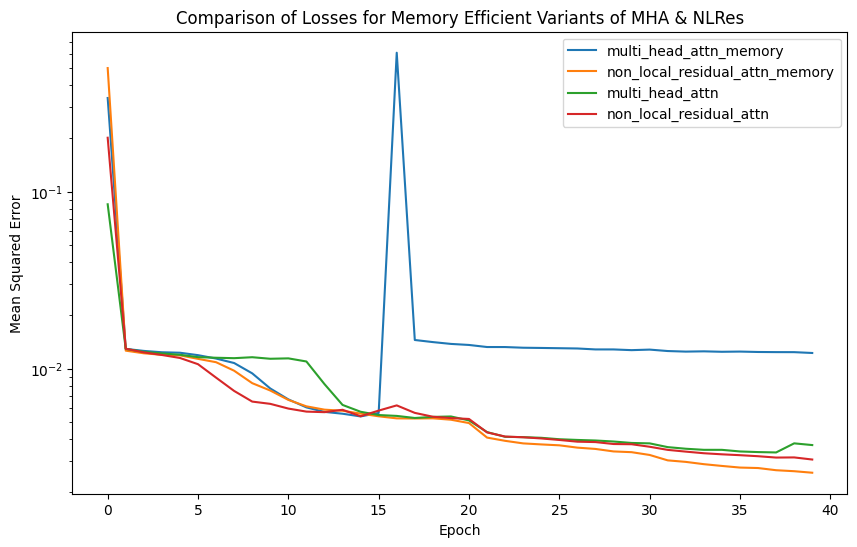

In [10]:
attn = {
    'multi_head_attn_memory': mha_memory,
    'non_local_residual_attn_memory': nlres_attn_memory,
    'multi_head_attn': mha,
    'non_local_residual_attn': nlres_attn

}

# Create a plot
plt.figure(figsize=(10, 6))

# Plot each dataset
for label, df in attn.items():
    plt.plot(df['epoch'], df['mean_squared_error'], label=label)

plt.yscale('log')
plt.title("Comparison of Losses for Memory Efficient Variants of MHA & NLRes")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()